In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
print(os.getcwd())

C:\Users\DKIN


In [3]:
data = pd.read_csv('.\Desktop\Python code\sms_spam\spam.csv')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
data['target']=encoder.fit_transform(data['target'])

In [11]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
data.duplicated().sum()

401

In [14]:
data = data.drop_duplicates(keep='first')

In [15]:
data.duplicated().sum()


0

# 2EDA

In [16]:
data['target'].value_counts()

0    4514
1     652
Name: target, dtype: int64

In [17]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['Ham',"Spam"],autopct="%0.2f")
plt.show()

<Figure size 640x480 with 1 Axes>

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DKIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
data['num_characters'] =data['text'].apply(len)

In [21]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
data.sample(5)

,target,text,num_characters,num_words
207,0,K:)k:)good:)study well.,23,12
2686,0,Hey tmr meet at bugis 930 ?,27,7
1216,0,Prakesh is there know.,22,5
952,0,Welp apparently he retired,26,4
547,0,"Sure, if I get an acknowledgement from you tha...",120,23


In [24]:
data['num_sent']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
data.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
#!pip install numpy==1.16.5 --user

In [27]:
print(np.__version__)

1.16.5


In [28]:
data[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5166.000000,5166.000000,5166.000000
mean,78.978901,18.286876,1.960511
std,58.236096,13.227585,1.431897
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [29]:
# ham
data[data['target'] == 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4514.000000,4514.000000,4514.000000
mean,70.474967,16.961675,1.815463
std,56.366669,13.397057,1.364395
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [30]:
# ham
data[data['target'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,652.000000,652.000000,652.000000
mean,137.854294,27.461656,2.964724
std,30.146064,6.890190,1.485304
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [31]:
import seaborn as sns

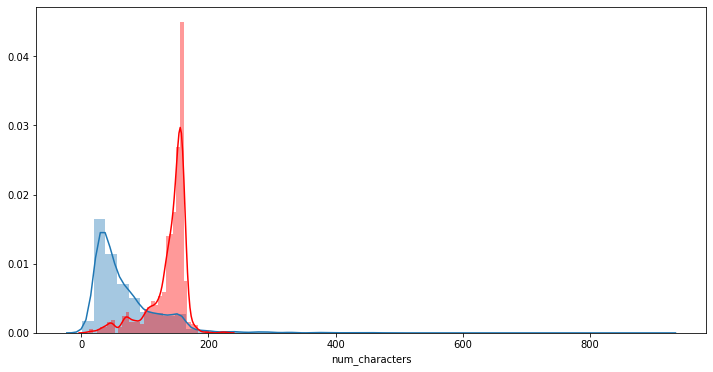

In [32]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['target']==0]['num_characters'])
sns.distplot(data[data['target']==1]['num_characters'], color='red')

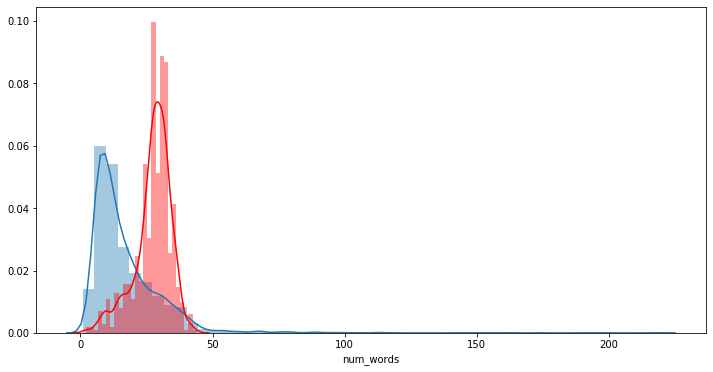

In [33]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['target'] == 0]['num_words'])
sns.distplot(data[data['target'] == 1]['num_words'],color='red')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


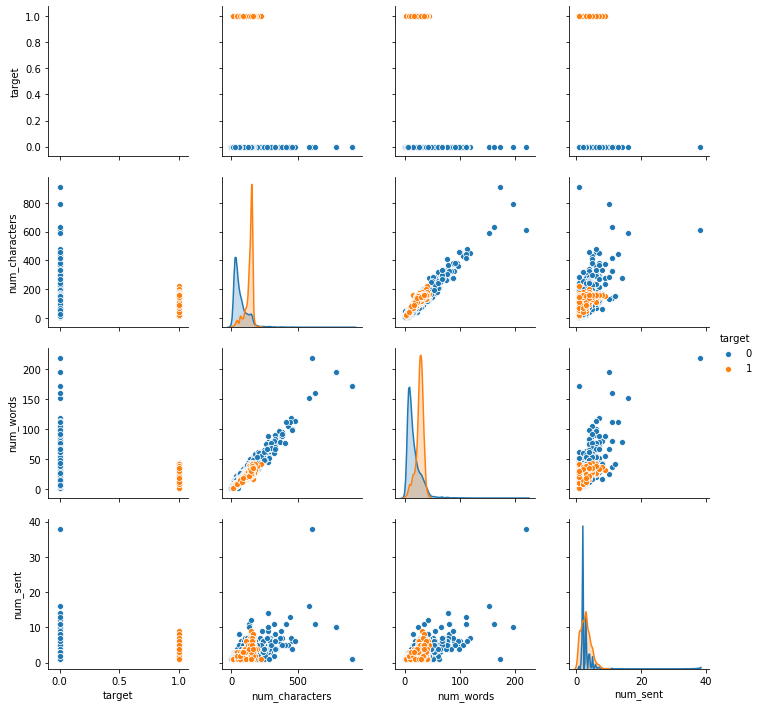

In [34]:
sns.pairplot(data,hue='target')

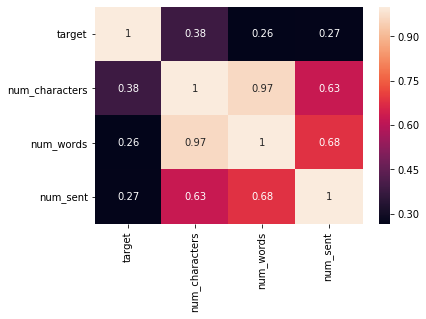

In [35]:
sns.heatmap(data.corr(),annot=True)
# There is high correlation between num char and num_word, 
#and between num_char and num sent also so droping both 
#and keeping num_char that will give more info

# 3 Data Preprocessing
   Lower case
    Tokenization
    remove speacial char
    remove stop word and punct
    stemming

In [36]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
stw = stopwords.words('english')
ps =PorterStemmer()

def transform_text(text):
    #Lowering Text
    text = text.lower()
    #Tokenizeing text
    text = nltk.word_tokenize(text)
    
    y=[]
    #Keeping only Alphabe
    for i in text:
        if i.isalnum():
            y.append(i)
     
    text=y[:]
    y.clear()
    # Removing stop word and punctuation
    for i in text:
        if i not in stw and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #stemming keeping only root words 
    for i in text:
        y.append(ps.stem(i))
    
    #Joining word as string  
    return " ".join(y)

In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, ok? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight ok cri enough today'

In [38]:
data['trans_text']=data['text'].apply(transform_text)

In [39]:
data.head(5)

,target,text,num_characters,num_words,num_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# word cloud

In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc=wc.generate(data[data['target']==1]['trans_text'].str.cat(sep=" "))

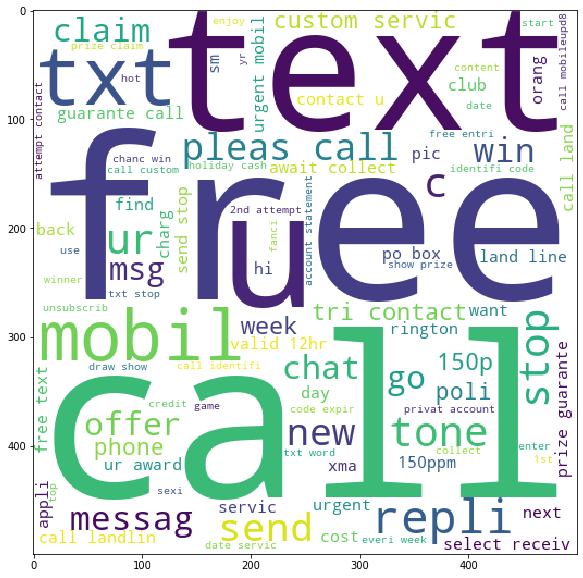

In [42]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)


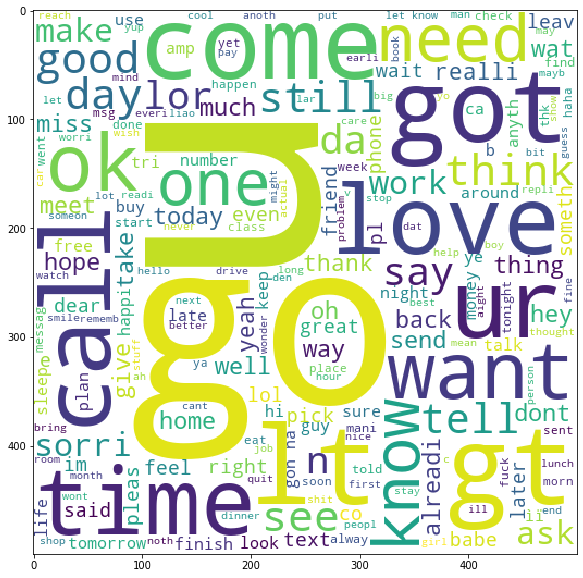

In [43]:
ham_wc=wc.generate(data[data['target']==0]['trans_text'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)

In [44]:
spam_corpus=[]
for msg in data[data['target']==1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

9857

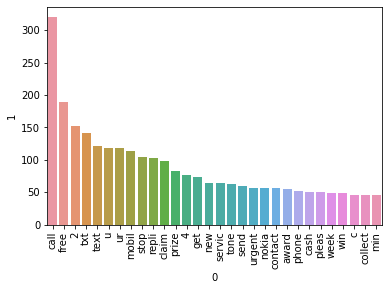

In [46]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
            ,pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
ham_corpus=[]
for msg in data[data['target']==0]['trans_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [48]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(10))

,0,1
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,272
7,got,236
8,like,234
9,know,234


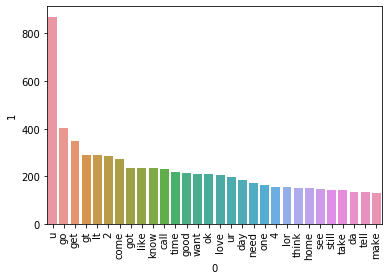

In [49]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
            ,pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [50]:
#Text to words

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [52]:
x =cv.fit_transform(data['trans_text']).toarray()

In [53]:
#x.toarray()

In [54]:
x.shape

(5166, 6628)

In [55]:
y=data['target'].values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8588007736943907
[[776 128]
 [ 18 112]]
0.4666666666666667


In [61]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[886  18]
 [ 11 119]]
0.8686131386861314


In [62]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[900   4]
 [ 24 106]]
0.9636363636363636


# Tf Idf using

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
x = tfidf.fit_transform(data['trans_text']).toarray()

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [66]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8558994197292069
[[776 128]
 [ 21 109]]
0.459915611814346


In [67]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[904   0]
 [ 28 102]]
1.0


In [68]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[902   2]
 [ 18 112]]
0.9824561403508771


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9748549323017408, 0.9642857142857143)

In [74]:
accuracy_scores = []
precision_scores = []
Model=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    Model.append(name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9642857142857143
For  KN
Accuracy -  0.9100580270793037
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9263157894736842
For  RF
Accuracy -  0.971953578336557
Precision -  0.9809523809523809
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9017857142857143
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8728813559322034
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9819819819819819
For  GBDT
Accuracy -  0.960348162475822
Precision -  0.9494949494949495
For  xgb
Accuracy -  0.9535783365570599
Precision -  0.9555555555555556


In [75]:
performance_df = pd.DataFrame({'Algorithm':Model,'Accuracy':accuracy_scores,'Precision':precision_scores})

In [76]:
performance_df.sort_values('Precision',ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.910058,1.000000
2,NB,0.972921,1.000000
8,ETC,0.977756,0.981982
5,RF,0.971954,0.980952
0,SVC,0.974855,0.964286
10,xgb,0.953578,0.955556
9,GBDT,0.960348,0.949495
4,LR,0.952611,0.926316
6,AdaBoost,0.961315,0.901786
7,BgC,0.959381,0.872881


In [77]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [78]:
performance_df1['value']

0     0.974855
1     0.910058
2     0.972921
3     0.935203
4     0.952611
5     0.971954
6     0.961315
7     0.959381
8     0.977756
9     0.960348
10    0.953578
11    0.964286
12    1.000000
13    1.000000
14    0.811881
15    0.926316
16    0.980952
17    0.901786
18    0.872881
19    0.981982
20    0.949495
21    0.955556
Name: value, dtype: float64

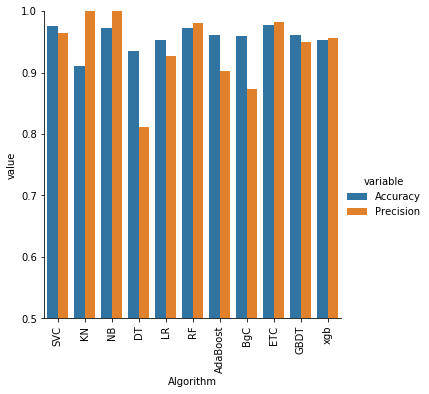

In [79]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Voting Classifier

In [80]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [81]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [82]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma=1.0, kernel='sigmoid',
                                  max_iter=-1, probability=True,
                                  random_state=None, shrinking=True, tol=0.001,
                                  verbose=False)),
                             ('nb',
                              MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True)),
                             ('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_featur

In [83]:
y_pred = voting.predict(x_test)
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)

Accuracy -  0.9535783365570599
Precision -  0.9555555555555556


# Stacking

In [84]:
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator =RandomForestClassifier()

In [85]:
#from sklearn.ensemble import StackingClassifier

NameError: name 'f' is not defined

In [ ]:
#from mlxtend.ensemble import StackingCVClassifier

In [ ]:
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
# # clf.fit(x_train,y_train)
# y_pred = clf.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))